# Multiple Variable Linear Regression

Here we try linear regression with multiple variables.

In [143]:
import copy, math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

We will create a synthetic data set that follows a relation $y = w_1x_1 + w_2x_2 + w_3x_3 + b$

or $\mathbf{y} = \mathbf{w} \cdot \mathbf{x} + b $



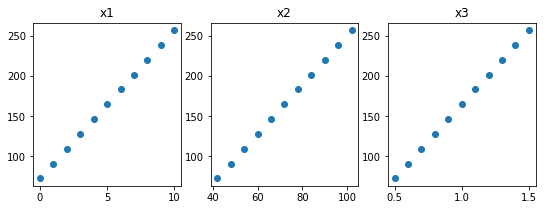

In [173]:
x1 = np.arange(0, 11, 1)
x2 = np.arange(42, 103, 6)
x3 = np.arange(0.5, 1.6, 0.1)
X_t = np.array([x1, x2, x3])

true_b = 5
w1, w2, w3 = 7, 0.9, 60
true_W = np.array([w1, w2, w3])

y_t = np.dot(true_W, X_t) + true_b

#Plot the training data to see what it looks like
plt.subplots(nrows=1, ncols=2, figsize=(9,3))

plt.subplot(1, 3, 1)
plt.scatter(X_t[0,:], y_t)
plt.title('x1')

plt.subplot(1, 3, 2)
plt.scatter(X_t[1,:], y_t)
plt.title('x2')

plt.subplot(1, 3, 3)
plt.scatter(X_t[2,:], y_t)
plt.title('x3')
plt.show()

Now we will pretend we don't know the true values of W and b, and set some initial estimates.

In [176]:
b_init = 0
w_init = np.array([0, 0, 0])

Now we will set up a function to calculate the cost:

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 

In [177]:
def cost(X, y, w, b):
  
    m = X.shape[0]
    f_wb = np.dot(np.transpose(X), w) + b
    cost = np.dot((f_wb - y), (f_wb - y)) / (2 * m)
    
    return cost

In [178]:
# Compute and display cost using our pre-chosen optimal parameters. 

cost_v = cost(X_t, y_t, w_init, b_init)
print(cost_v)

55998.50666666666


# Gradient Descent
We will use the following to perform gradient descent:

$$\begin{align*} \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}  \; \newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline
\end{align*}$$


$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align}
$$

This is implemented in the following function:

In [181]:
def grad(X, y, w, b):

    m = X.shape[0]
    err = np.dot(np.transpose(X), w) + b - y
    dj_dw = np.dot(X, err) / m
    dj_db = np.sum(err) / m
    
    return dj_db, dj_dw
    

In [183]:
#Compute and display initial gradient 
tmp_dj_db, tmp_dj_dw = grad(X_t, y_t, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -604.2666666666667
dj_dw at initial w,b: 
 [ -3696.         -47555.2          -671.73333333]


<a name="toc_15456_5.2"></a>
## 5.2 Gradient Descent With Multiple Variables
The routine below implements equation (5) above.

In [201]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
        
    # An array to store cost J at each iteration
    J_hist = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = grad(X, y, w, b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_hist.append(cost(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}   ")
        
    return w, b, J_hist 

Now we implement gradient descent:

In [202]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 1.5e-8
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_t, y_t, initial_w, initial_b,
                                            cost, grad, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_t.shape
for i in range(m):
    print(f"prediction: {np.dot(np.transpose(X_t[:,i]), w_final) + b_final}, target value: {y_t[i]}")

Iteration    0: Cost 55964.37   
Iteration 1000: Cost 30460.99   
Iteration 2000: Cost 16654.26   
Iteration 3000: Cost  9179.71   
Iteration 4000: Cost  5133.18   
Iteration 5000: Cost  2942.48   
Iteration 6000: Cost  1756.44   
Iteration 7000: Cost  1114.30   
Iteration 8000: Cost   766.62   
Iteration 9000: Cost   578.33   
b,w found by gradient descent: 0.03,[0.18168619 2.21637091 0.0315764 ] 
prediction: 93.13018183260209, target value: 72.80000000000001
prediction: 106.61325110338687, target value: 91.2
prediction: 120.09632037417164, target value: 109.6


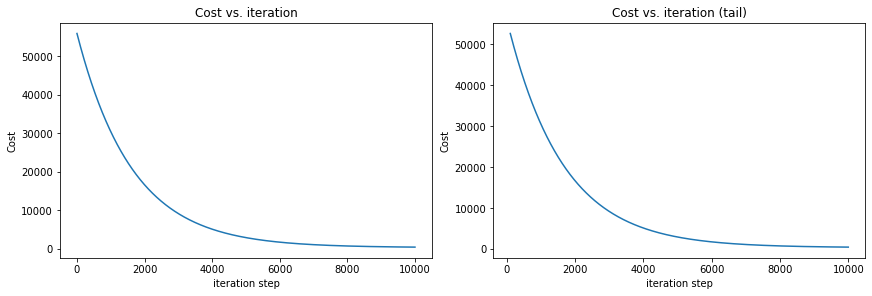

In [203]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

At the moment we are struggling to get the cost to converge. To improve the algorithm we can use feature scaling. We'll try mean normalisation, which is given by: $x_i := \dfrac{x_i - \mu_i}{max - min}$

In [204]:
#Initialise normalised X
X_norm_t = np.zeros(np.shape(X_t))

for i in range(len(X_t)):

    xi = X_t[i,:]
    norm_xi = (xi - np.mean(xi))/(np.max(xi)-np.min(xi))
    X_norm_t[i,:] = norm_xi


print(X_norm_t)


[[-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
 [-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]
 [-0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5]]


In [205]:
#Now re-run gradient descent with the normalised inputs
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 200
alpha = 3e-1
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm_t, y_t, initial_w, initial_b,
                                            cost, grad, alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_t.shape
for i in range(m):
    print(f"prediction: {np.dot(np.transpose(X_norm_t[:,i]), w_final) + b_final}, target value: {y_t[i]}")

Iteration    0: Cost  3284.21   
Iteration   20: Cost     0.00   
Iteration   40: Cost     0.00   
Iteration   60: Cost     0.00   
Iteration   80: Cost     0.00   
Iteration  100: Cost     0.00   
Iteration  120: Cost     0.00   
Iteration  140: Cost     0.00   
Iteration  160: Cost     0.00   
Iteration  180: Cost     0.00   
b,w found by gradient descent: 164.80,[61.33333333 61.33333333 61.33333333] 
prediction: 72.80000000000003, target value: 72.80000000000001
prediction: 91.20000000000002, target value: 91.2
prediction: 109.60000000000002, target value: 109.6


It looks like our predictions are better. Let's see how the cost varies with each iteration.

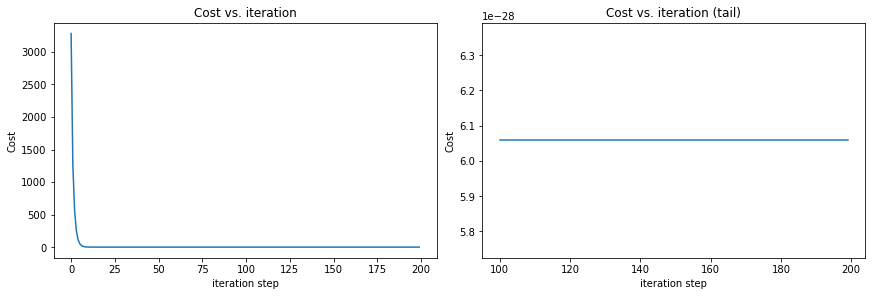

In [206]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

Now gradient descent converges and does so much faster, allowing us to use a larger $alpha$.

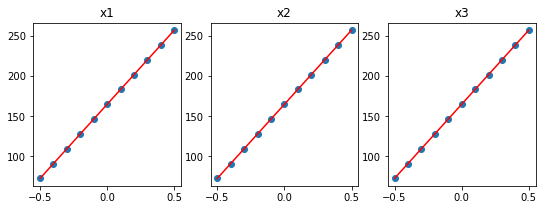

In [208]:
#Plot the normalised training data with the model superimposed
plt.subplots(nrows=1, ncols=3, figsize=(9,3))

y_predicted = np.dot(np.transpose(X_norm_t), w_final) + b_final

x1_norm = X_norm_t[0,:]
plt.subplot(1, 3, 1)
plt.scatter(x1_norm, y_t)
plt.plot(x1_norm, y_predicted, color = 'red')
plt.title('x1')

x2_norm = X_norm_t[1,:]
plt.subplot(1, 3, 2)
plt.scatter(x2_norm, y_t)
plt.plot(x2_norm, y_predicted, color = 'red')
plt.title('x2')

x3_norm = X_norm_t[2,:]
plt.subplot(1, 3, 3)
plt.scatter(x3_norm, y_t)
plt.plot(x3_norm, y_predicted,color = 'red')
plt.title('x3')
plt.show()